In [1]:
# Xiang Dong
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

In [90]:
houses = pd.read_csv("./data.csv")
cols = ['constructionTime', 'renovationCondition', 'elevator', 'price']
df3 = houses[cols]
df3.head()

/Users/dongxiang/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,constructionTime,renovationCondition,elevator,price
0,2005,3,1,31680
1,2004,4,1,43436
2,2005,3,1,52021
3,2008,1,1,22202
4,1960,2,0,48396


#### First, let's look at some distribution.

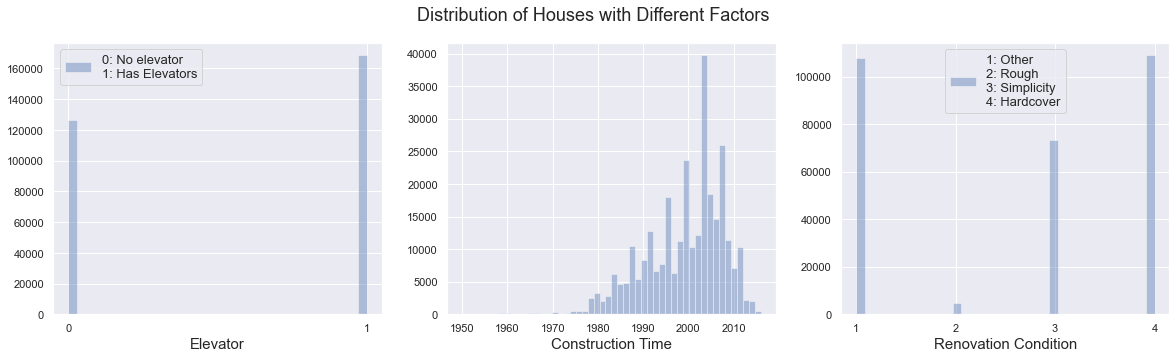

In [88]:
# create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,5))
fig.suptitle('Distribution of Houses with Different Factors', fontsize = 18)

# first - Elevator
sns.distplot(a = df3['elevator'],kde = False, ax = ax1)
ax1.set_xlabel('Elevator', fontsize = 15)
ax1.set_xticks([0,1])
ax1.legend(labels = ["0: No elevator\n1: Has Elevators"], fontsize = 13)

# second - Construction Time
sns.distplot(a = df3['constructionTime'],kde = False, ax= ax2)
ax2.set_xlabel('Construction Time', fontsize = 15)

# third - Renovation Condition
sns.distplot(a = df3['renovationCondition'],kde = False, ax = ax3)
ax3.set_xticks([1,2,3,4])
ax3.set_xlabel('Renovation Condition', fontsize = 15)
ax3.legend(labels = ["1: Other\n2: Rough\n3: Simplicity\n4: Hardcover"], fontsize = 13)

#### Now let's see the correlation of these factors with price.

Text(0, 0.5, 'Price')

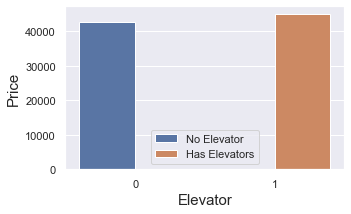

In [84]:
# Elevator
plt.figure(figsize = (5,3))
elevator_price = df3.groupby('elevator').price.mean()

labels=["No Elevator", "Has Elevators"]
ax_elevator = sns.barplot(x = elevator_price.index, y = elevator_price, hue = elevator_price.index)
h, l = ax_elevator.get_legend_handles_labels()
ax_elevator.legend(h, labels, loc = 8)

plt.xlabel("Elevator", fontsize = 15)
plt.ylabel("Price", fontsize = 15)

Text(0, 0.5, 'Price')

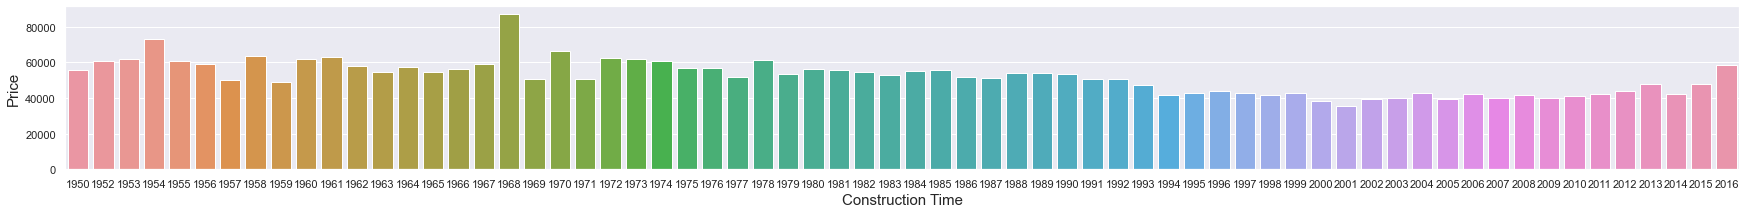

In [80]:
# Construction Time
plt.figure(figsize = (30,3))
ConstructionTime_price = df3.groupby('constructionTime').price.mean()
sns.barplot(x = ConstructionTime_price.index, y = ConstructionTime_price)

plt.xlabel("Construction Time", fontsize = 15)
plt.ylabel("Price", fontsize = 15)

Text(0, 0.5, 'Price')

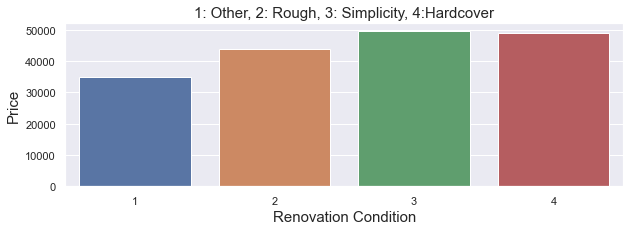

In [83]:
# Renovation Condition
fig = plt.figure(figsize = (10,3))
renovation_price = df3.groupby('renovationCondition').price.mean()
sns.barplot(x = renovation_price.index, y = renovation_price)

labels2 = "1: Other, 2: Rough, 3: Simplicity, 4:Hardcover"
plt.title(labels2, fontsize = 15)
plt.xlabel("Renovation Condition", fontsize = 15)
plt.ylabel("Price", fontsize = 15)